# Chapter.4 Single-variate Linear Regression

## Programming Assignment.4-03 GDM with Contour Plots

PA 4-03에서는 PA 4-02에서 만들었던 loss function들을 이용해 GDM을 적용해봅니다.  
이를 통해 최종적으로 각 data sample을 이용하여 $\theta_{1}, \theta_{0}$를 update할 때 어떤 모습으로 학습되는지 확인합니다.

그리고 다음과 같은 단계들로 이루어집니다.

<ul>
    <li> Step.1 GDM with $\mathcal{L} = \theta_{1}^{2} + \theta_{0}^{2}$ </li>
    <li> Step.2 GDM with $\mathcal{L} = a\theta_{1}^{2} + \theta_{0}^{2}$ </li>
    <li> Step.3 GDM with $\mathcal{L} = \theta_{1}^{2} + \theta_{0}^{2} + c\theta_{1}\theta_{0}$ </li>
    <li> Step.4 GDM with $\mathcal{L} = (y - (\theta_{1}x + \theta_{0}))^{2}$ </li>
</ul>


In [51]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.style.use('seaborn')
np.random.seed(0)

***
## Step.1 GDM with $\mathcal{L} = \theta_{1}^{2} + \theta_{0}^{2}$

먼저 
$$\mathcal{L}(\theta_{1}, \theta_{0}) = \theta_{1}^{2} + \theta_{0}^{2}$$
에 대해 GDM을 적용해봅니다.

이때 $\mathcal{L}$에 대한 $\theta_{1}, \theta_{0}$의 partial derivative는 다음과 같습니다.
$$\frac{\partial \mathcal{L}}{\partial \theta_{1}} = 2\theta_{1}, \quad
\frac{\partial \mathcal{L}}{\partial \theta_{0}} = 2\theta_{0}$$

따라서 $\theta_{1}, \theta_{0}$에 대한 GDM formula는 다음과 같습니다.

$$\theta_{1} := \theta_{1} - \alpha \frac{\partial \mathcal{L}}{\partial \theta_{1}}
= \theta_{1} - 2\alpha \theta_{1}$$
$$\theta_{0} := \theta_{0} - \alpha \frac{\partial \mathcal{L}}{\partial \theta_{0}}
= \theta_{0} - 2\alpha \theta_{0}$$

다음은 예제 코드로 위의 loss function에 대해 GDM을 적용하는 코드입니다.  
이때 학습 조건은 다음과 같습니다.
- initial theta1, theta0 = -0.5, -1.5
- learning rate = 0.05
- total iteration = 30


다음 셀을 실행시켜 loss의 모습을 살펴보세요.  
참고로 %matplotlib qt는 magic command로 3d plot을 회전하면서 확인할 수 있도록 외부 창에 그래프를 보여줍니다.

Text(0, 0.5, '$\\theta_{0}$')

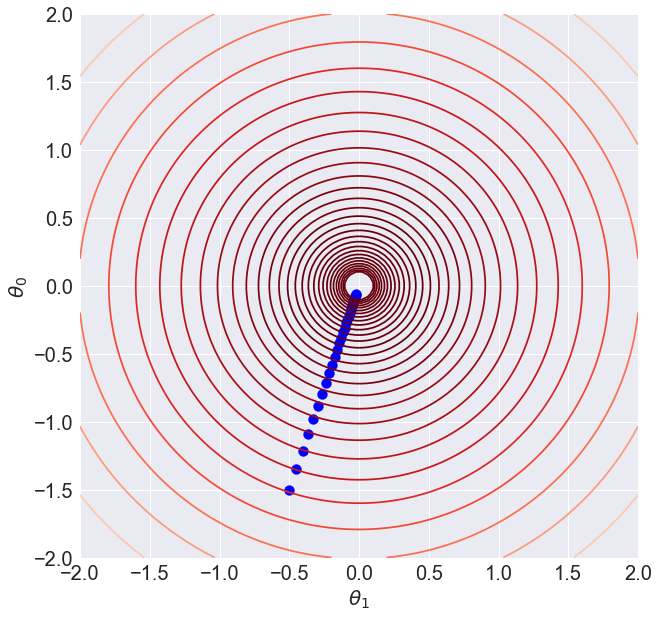

In [49]:
# Learning Preparation
th1, th0 = -0.5, -1.5
lr = 0.05
iterations = 30

th1_list, th0_list = [th1], [th0]

# Loss Function
th1_range = np.linspace(-2, 2, 100)
th0_range = np.linspace(-2, 2, 100)
Th1, Th0 = np.meshgrid(th1_range, th0_range)

loss = np.power(Th1,2) + np.power(Th0, 2)

# Gradient Descent Method
for iteration in range(iterations):
    # Partial Derivatives
    dth1 = 2*th1
    dth0 = 2*th0
    
    # Parameter Update
    th1 = th1 - lr*dth1
    th0 = th0 - lr*dth0
    
    th1_list.append(th1)
    th0_list.append(th0)
    

# th1, th0 Update Visualization
fig, ax = plt.subplots(figsize = (10,10))
levels = np.geomspace(np.min(loss) + 0.01, np.max(loss), 30)
cmap = cm.get_cmap('Reds_r', lut = len(levels))
ax.contour(Th1, Th0, loss, levels = levels, cmap = cmap)
ax.scatter(th1_list, th0_list,
           s = 100, c = 'b')
ax.tick_params(axis = 'both', labelsize = 20)
ax.set_xlabel(r'$\theta_{1}$', fontsize = 20)
ax.set_ylabel(r'$\theta_{0}$', fontsize = 20)

***
## Step.2 Contour Plot of $\mathcal{L} = a\theta_{1}^{2} + \theta_{0}^{2}$

Step.2에서는 $\mathcal{L} = a\theta_{1}^{2} + \theta_{0}^{2}$에 대한 GDM을 진행합니다.  


이때 $\mathcal{L}$에 대한 $\theta_{1}, \theta_{0}$의 partial derivative는 다음과 같습니다.
$$\frac{\partial \mathcal{L}}{\partial \theta_{1}} = 2a \theta_{1}, \quad
\frac{\partial \mathcal{L}}{\partial \theta_{0}} = 2\theta_{0}$$

따라서 $\theta_{1}, \theta_{0}$에 대한 GDM formula는 다음과 같습니다.

$$\theta_{1} := \theta_{1} - \alpha \frac{\partial \mathcal{L}}{\partial \theta_{1}}
= \theta_{1} - 2a \alpha \theta_{1}$$
$$\theta_{0} := \theta_{0} - \alpha \frac{\partial \mathcal{L}}{\partial \theta_{0}}
= \theta_{0} - 2\alpha \theta_{0}$$

즉, gradient $(\frac{\partial \mathcal{L}}{\partial \theta_{1}}, \frac{\partial \mathcal{L}}{\partial \theta_{0}}$)의 방향이 a에 영향을 받는다는 것을 알 수 있다.


***
**Programming**  
다음의 조건에서 loss function
$$\mathcal{L}(\theta_{1}, \theta_{0}) = a\theta_{1}^{2} + \theta_{0}^{2}$$
에 대해 1보다 큰 다양한 a에 대해 GDM을 적용해보고, 학습의 경향성을 분석하세요.

- initial theta1, theta0 = -0.5, -1.5
- learning rate = 0.05
- total iteration = 30

Text(0, 0.5, '$\\theta_{0}$')

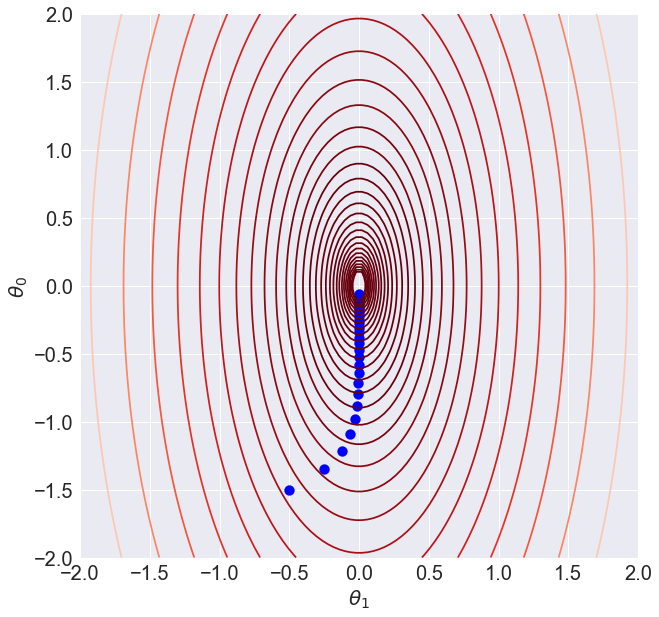

In [52]:
##### Start Your Code(Learning Preparation) #####
a = 5

th1, th0 = -0.5, -1.5
lr = 0.05
iterations = 30
##### Start Your Code(Learning Preparation) #####

th1_list, th0_list = [th1], [th0]

th1_range = np.linspace(-2, 2, 100)
th0_range = np.linspace(-2, 2, 100)
Th1, Th0 = np.meshgrid(th1_range, th0_range)

##### Start Your Code(Loss Function) #####
loss = a*np.power(Th1,2) + np.power(Th0, 2)
##### End Your Code(Loss Function) #####


for iteration in range(iterations):
    ##### Start Your Code(Partial Derivatives) #####
    dth1 = 2*a*th1
    dth0 = 2*th0
    ##### Start Your Code(Partial Derivatives) #####
    
    
    ##### Start Your Code(Parameter Update) #####
    th1 = th1 - lr*dth1
    th0 = th0 - lr*dth0
    ##### Start Your Code(Parameter Update) #####
    
    
    th1_list.append(th1)
    th0_list.append(th0)
    
    
fig, ax = plt.subplots(figsize = (10,10))
levels = np.geomspace(np.min(loss) + 0.01, np.max(loss), 30)
cmap = cm.get_cmap('Reds_r', lut = len(levels))
ax.contour(Th1, Th0, loss, levels = levels, cmap = cmap)
ax.scatter(th1_list, th0_list,
           s = 100, c = 'b')
ax.tick_params(axis = 'both', labelsize = 20)
ax.set_xlabel(r'$\theta_{1}$', fontsize = 20)
ax.set_ylabel(r'$\theta_{0}$', fontsize = 20)

***
**Programming**  
다음의 조건에서 loss function
$$\mathcal{L}(\theta_{1}, \theta_{0}) = a\theta_{1}^{2} + \theta_{0}^{2}$$
에 대해 0보다 크고 1보다 작은 다양한 a에 대해 GDM을 적용해보고, 학습의 경향성을 분석하세요.

- initial theta1, theta0 = -0.5, -1.5
- learning rate = 0.05
- total iteration = 30

Text(0, 0.5, '$\\theta_{0}$')

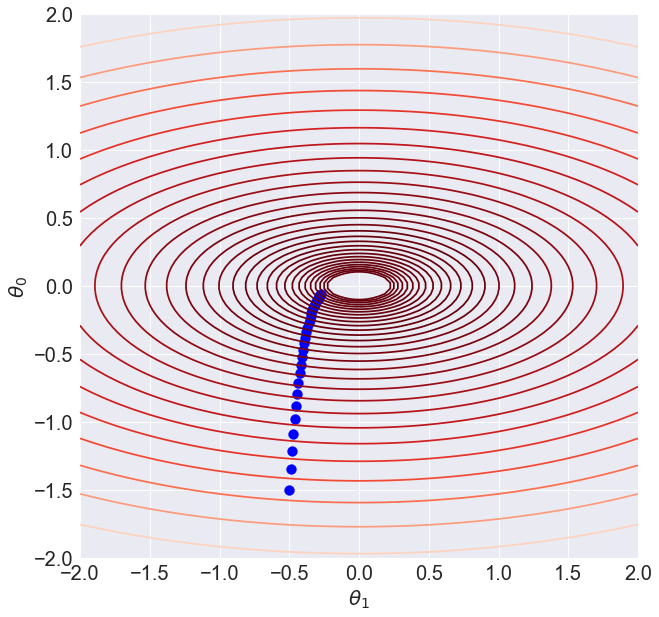

In [23]:
##### Start Your Code(Learning Preparation) #####
a = 0.2

th1, th0 = -0.5, -1.5
lr = 0.05
iterations = 30
##### End Your Code(Learning Preparation) #####

th1_list, th0_list = [th1], [th0]

th1_range = np.linspace(-2, 2, 100)
th0_range = np.linspace(-2, 2, 100)
Th1, Th0 = np.meshgrid(th1_range, th0_range)

##### Start Your Code(Loss Function) #####
loss = a*np.power(Th1,2) + np.power(Th0, 2)
##### End Your Code(Loss Function) #####

for iteration in range(iterations):
    ##### Start Your Code(Partial Derivatives) #####
    dth1 = 2*a*th1
    dth0 = 2*th0
    ##### End Your Code(Partial Derivatives) #####
    
    ##### Start Your Code(Parameter Update) #####
    th1 = th1 - lr*dth1
    th0 = th0 - lr*dth0
    ##### End Your Code(Parameter Update) #####
    
    
    th1_list.append(th1)
    th0_list.append(th0)
    
    
fig, ax = plt.subplots(figsize = (10,10))
levels = np.geomspace(np.min(loss) + 0.01, np.max(loss), 30)
cmap = cm.get_cmap('Reds_r', lut = len(levels))
ax.contour(Th1, Th0, loss, levels = levels, cmap = cmap)
ax.scatter(th1_list, th0_list,
           s = 100, c = 'b')
ax.tick_params(axis = 'both', labelsize = 20)
ax.set_xlabel(r'$\theta_{1}$', fontsize = 20)
ax.set_ylabel(r'$\theta_{0}$', fontsize = 20)

***
## Step.3 Step.3 GDM with $\mathcal{L} = \theta_{1}^{2} + \theta_{0}^{2} + c\theta_{1}\theta_{0}$

Step.3에서는 $\mathcal{L} = \theta_{1}^{2} + \theta_{0}^{2} + c\theta_{1}\theta_{0}$에 대해 GDM을 적용해봅니다.  

이때 $\mathcal{L}$에 대한 $\theta_{1}, \theta_{0}$의 partial derivative는 다음과 같습니다.
$$\frac{\partial \mathcal{L}}{\partial \theta_{1}} = 2\theta_{1} + c\theta_{0}, \quad
\frac{\partial \mathcal{L}}{\partial \theta_{0}} = 2\theta_{0} + c\theta_{1}$$

따라서 $\theta_{1}, \theta_{0}$에 대한 GDM formula는 다음과 같습니다.

$$\theta_{1} := \theta_{1} - \alpha \frac{\partial \mathcal{L}}{\partial \theta_{1}}
= \theta_{1} - \alpha(2\theta_{1} + c\theta_{0})$$
$$\theta_{0} := \theta_{0} - \alpha \frac{\partial \mathcal{L}}{\partial \theta_{0}}
= \theta_{0} - \alpha(2\theta_{0} + c\theta_{1})$$


***
**Programming**  
다음의 loss function
$$\mathcal{L}(\theta_{1}, \theta_{0}) = \theta_{1}^{2} + \theta_{0}^{2} + c\theta_{1}\theta_{0}$$
에 대해 다양한 c를 사용하여 GDM을 적용해보고, 학습의 경향성을 분석하세요.  
이때 c는 -2부터 2까지의 값이어야합니다.

Text(0, 0.5, '$\\theta_{0}$')

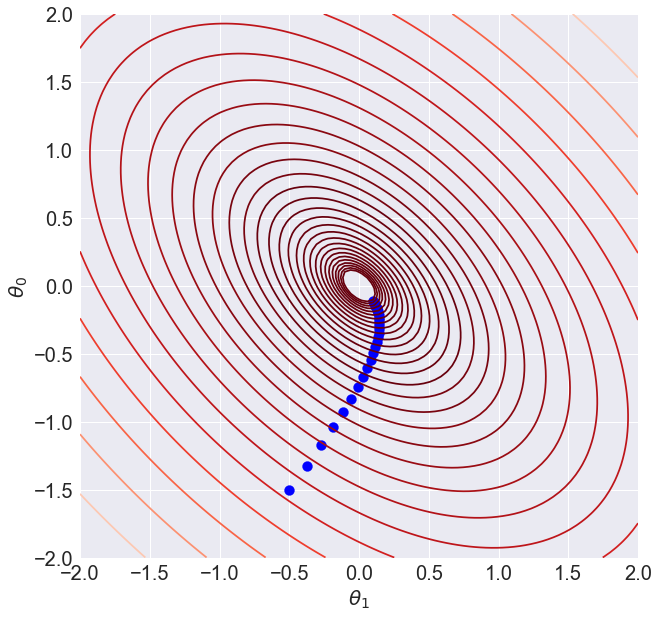

In [55]:
##### Start Your Code(Learning Preparation) #####
c = 1

th1, th0 = -0.5, -1.5
lr = 0.05
iterations = 30
##### End Your Code(Learning Preparation) #####

th1_list, th0_list = [th1], [th0]

th1_range = np.linspace(-2, 2, 100)
th0_range = np.linspace(-2, 2, 100)
Th1, Th0 = np.meshgrid(th1_range, th0_range)

##### Start Your Code(Loss Function) #####
loss = np.power(Th1,2) + np.power(Th0, 2) + c*Th1*Th0
##### End Your Code(Loss Function) #####

for iteration in range(iterations):
    ##### Start Your Code(Partial Derivatives) #####
    dth1 = 2*th1 + c*th0
    dth0 = 2*th0 + c*th1
    ##### End Your Code(Partial Derivatives) #####
    
    
    ##### Start Your Code(Parameter Update) #####
    th1 = th1 - lr*dth1
    th0 = th0 - lr*dth0
    ##### End Your Code(Parameter Update) #####
    
    th1_list.append(th1)
    th0_list.append(th0)
    
    
fig, ax = plt.subplots(figsize = (10,10))
levels = np.geomspace(np.min(loss) + 0.01, np.max(loss), 30)
cmap = cm.get_cmap('Reds_r', lut = len(levels))
ax.contour(Th1, Th0, loss, levels = levels, cmap = cmap)
ax.scatter(th1_list, th0_list,
           s = 100, c = 'b')
ax.tick_params(axis = 'both', labelsize = 20)
ax.set_xlabel(r'$\theta_{1}$', fontsize = 20)
ax.set_ylabel(r'$\theta_{0}$', fontsize = 20)

***
## Step.4 Loss Functions in Reality

Step.4에서는 실제 loss function
$$\mathcal{L}(\theta_{1},\theta_{0})=(y - (\theta_{1} x + \theta_{0}))^{2}$$
에 GDM을 적용해봅니다. 

그리고 Step.4에서는 data sample에 따른 학습에 집중하기 위해 한 번의 학습에는 하나의 data sample만을 사용합니다.  

이때 $\mathcal{L}$에 대한 $\theta_{1}, \theta_{0}$의 partial derivative는 다음과 같습니다.
$$\frac{\partial \mathcal{L}}{\partial \theta_{1}} = -2x(y -\hat{y}), \quad
\frac{\partial \mathcal{L}}{\partial \theta_{0}} = -2(y -\hat{y})$$

따라서 $\theta_{1}, \theta_{0}$에 대한 GDM formula는 다음과 같습니다.

$$\theta_{1} := \theta_{1} - \alpha \frac{\partial \mathcal{L}}{\partial \theta_{1}}
= \theta_{1} +2\alpha x(y -\hat{y})$$
$$\theta_{0} := \theta_{0} - \alpha \frac{\partial \mathcal{L}}{\partial \theta_{0}}
= \theta_{0} + 2\alpha (y -\hat{y})$$


***
**Programming**  
다음의 조건에서 $y = x + 3$에서 만들어진 data point $(x,y) = (2,5)$를 이용하여 GDM을 진행하세요.

- initial theta1, theta0 = -0.5, -1.5
- (x,y) = (2,5)
- learning rate = 0.05
- total iteration = 30

**Further Work** GDM이 진행되는 동안 $\theta_{1}, \theta_{0}$가 target theta인 $\theta_{1}^{*}=1, \theta_{0}^{*}=3$에 가까워지는지 확인하시오.

Text(0, 0.5, '$\\theta_{0}$')

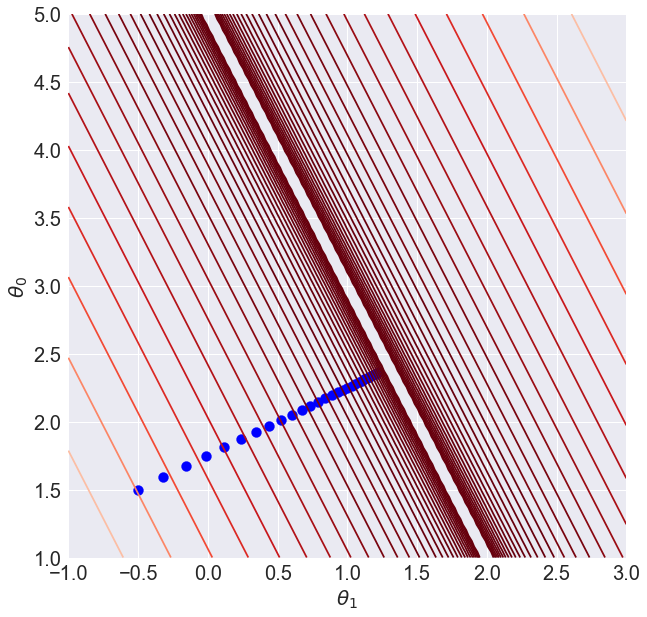

In [58]:
##### Start Your Code(Learning Preparation) #####
x = 2
y = x + 3

th1, th0 = -0.5, 1.5
lr = 0.01
iterations = 30
##### End Your Code(Learning Preparation) #####
th1_list, th0_list = [th1], [th0]

th1_range = np.linspace(-1, 3, 100)
th0_range = np.linspace(1, 5, 100)
Th1, Th0 = np.meshgrid(th1_range, th0_range)

##### Start Your Code(Loss Function) #####
loss = np.power(y - (Th1*x + Th0), 2)
##### End Your Code(Loss Function) #####

for iteration in range(iterations):
    ##### Start Your Code(Prediction Calculation) #####
    pred = th1*x + th0
    ##### Start Your Code(Prediction Calculation) #####
    
    
    ##### Start Your Code(Partial Derivatives) #####
    dth1 = -2*x*(y - pred)
    dth0 = -2*(y - pred)
    ##### End Your Code(Partial Derivatives) #####
    
    
    ##### Start Your Code(Parameter Update) #####
    th1 = th1 - lr*dth1
    th0 = th0 - lr*dth0
    ##### End Your Code(Parameter Update) #####
    
    th1_list.append(th1)
    th0_list.append(th0)
    
    
fig, ax = plt.subplots(figsize = (10,10))
levels = np.geomspace(np.min(loss) + 0.01, np.max(loss), 30)
cmap = cm.get_cmap('Reds_r', lut = len(levels))
ax.contour(Th1, Th0, loss, levels = levels, cmap = cmap)
ax.scatter(th1_list, th0_list,
           s = 100, c = 'b')
ax.tick_params(axis = 'both', labelsize = 20)
ax.set_xlabel(r'$\theta_{1}$', fontsize = 20)
ax.set_ylabel(r'$\theta_{0}$', fontsize = 20)

***
**Programming**  
$y = x + 3$에서 만들어진 data sample들을 포함하는 다음과 같은 dataset이 주어졌다고 가정합니다.
$$\mathcal{D} = \{ (x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), (x^{(3)}, y^{(3)}), (x^{(4)}, y^{(4)}), (x^{(5)}, y^{(5)}), (x^{(6)}, y^{(6)}) \} =
\{ (-2,1), (-1,2), (0,3), (1,4), (2,5), (5,8) \}
$$

이때 각 data sample들에 대한 GDM을 진행하고, 각 data sample들을 이용하여 $\theta_{1}, \theta_{0}$을 update시킬 때의 차이점을 분석하세요.

**Further Work** 2개의 learnable parameter $\theta_{1}, \theta_{0}$을 학습시키기 위해 1개의 data sample로 가능한지, 불가능한지 설명하고 그 이유를 제시하세요.

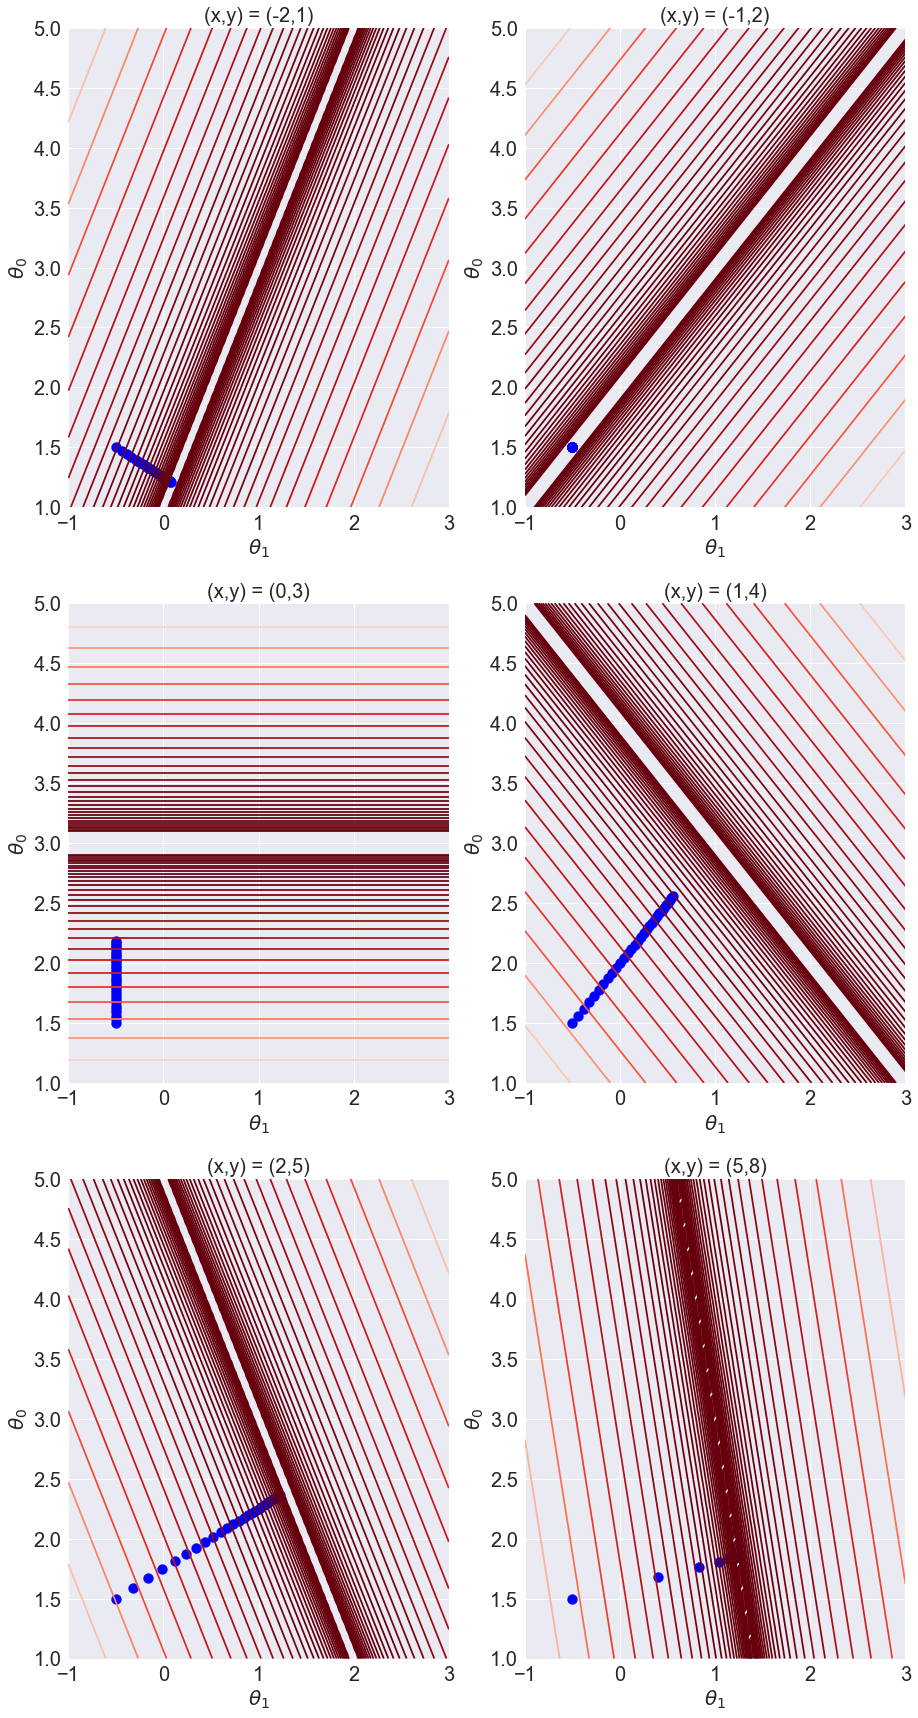

In [61]:
##### Start Your Code(Dataset Preparation) #####
x_data = np.array([-2, -1, 0, 1, 2, 5])
y_data = x_data + 3
##### End Your Code(Dataset Preparation) #####


##### Start Your Code(Learning Preparation) #####
lr = 0.01
iterations = 30
##### End Your Code(Learning Preparation) #####

th1_range = np.linspace(-1, 3, 100)
th0_range = np.linspace(1, 5, 100)
Th1, Th0 = np.meshgrid(th1_range, th0_range)

fig, axes = plt.subplots(3, 2, figsize = (15,30))
for ax_idx, (ax, x, y) in enumerate(zip(axes.flat, x_data, y_data)):
    ##### Start Your Code(Theta Initialization) #####
    th1, th0 = -0.5, 1.5
    th1_list, th0_list = [th1], [th0]
    ##### End Your Code(Theta Initialization) #####
    
    ##### Start Your Code(Loss Function) #####
    loss = np.power(y - (Th1*x + Th0), 2)
    ##### End Your Code(Loss Function) #####

    
    for iteration in range(iterations):
        ##### Start Your Code(Prediction Calculation) #####
        pred = th1*x + th0
        ##### End Your Code(Prediction Calculation) #####

        
        ##### Start Your Code(Partial Derivatives) #####
        dth1 = -2*x*(y - pred)
        dth0 = -2*(y - pred)
        ##### End Your Code(Partial Derivatives) #####

        
        ##### Start Your Code(Parameter Update) #####
        th1 = th1 - lr*dth1
        th0 = th0 - lr*dth0
        ##### End Your Code(Parameter Update) #####

        
        th1_list.append(th1)
        th0_list.append(th0)
    
    levels = np.geomspace(np.min(loss) + 0.01, np.max(loss), 30)
    cmap = cm.get_cmap('Reds_r', lut = len(levels))
    ax.contour(Th1, Th0, loss, levels = levels, cmap = cmap)
    
    ax.scatter(th1_list, th0_list,
               s = 100, c = 'b')
    ax.tick_params(axis = 'both', labelsize = 20)
    ax.set_xlabel(r'$\theta_{1}$', fontsize = 20)
    ax.set_ylabel(r'$\theta_{0}$', fontsize = 20)
    ax.set_title('(x,y) = (%d,%d)'%(x,y), fontsize = 20)
    